In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
loan_perf = pd.read_csv('loan_perf_18_20_mi.csv')

C:\Users\eugen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
loan_perf

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_area,mortgage_insurance_percentage,number_of_units,occupancy_status,original_combined_loan-to-value,original_debt-to-income_ratio,...,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,current_interest_rate,current_deferred_upb,estimated_loan-to-value,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb
0,791,201803,Y,204802,33124.0,25,1,P,89,44,...,300000.0,0,0,360,4.000,0.0,NaN,NaN,NaN,NaN
1,791,201803,Y,204802,33124.0,25,1,P,89,44,...,300000.0,0,1,359,4.000,0.0,NaN,NaN,NaN,NaN
2,791,201803,Y,204802,33124.0,25,1,P,89,44,...,299000.0,0,2,358,4.000,0.0,NaN,NaN,NaN,NaN
3,791,201803,Y,204802,33124.0,25,1,P,89,44,...,299000.0,0,3,357,4.000,0.0,NaN,NaN,NaN,NaN
4,791,201803,Y,204802,33124.0,25,1,P,89,44,...,298000.0,0,4,356,4.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161982,815,202012,9,204011,22744.0,0,1,P,77,38,...,412000.0,0,2,239,2.625,0.0,NaN,NaN,NaN,NaN
1161983,745,202010,9,205009,22744.0,12,1,P,84,44,...,311000.0,0,2,358,2.990,0.0,NaN,NaN,NaN,NaN
1161984,745,202010,9,205009,22744.0,12,1,P,84,44,...,311000.0,0,3,357,2.990,0.0,NaN,NaN,NaN,NaN
1161985,715,202011,9,205010,33124.0,0,1,P,70,27,...,223000.0,0,1,359,3.125,0.0,NaN,NaN,NaN,NaN


In [39]:
loan_perf = loan_perf[['loan_sequence_number', 'monthly_reporting_period',
       'current_actual_upb', 'original_upb', 'loan_age', 'maturity_date', 
       'remaining_months_to_legal_maturity','credit_score',
       'original_interest_rate','current_interest_rate', 
       'estimated_loan-to-value', 
       'first_payment_date', 'first_time_homebuyer_flag',
       'metropolitan_area', 'mortgage_insurance_percentage', 'number_of_units',
       'occupancy_status', 'original_combined_loan-to-value', 'original_loan-to-value', 
       'original_debt-to-income_ratio',
       'property_type', 'postal_code',
       'original_loan_term', 'zero_balance_code', 'zero_balance_effective_date', 'zero_balance_removal_upb']]

In [40]:
# converting date, getting year and month
loan_perf['date'] = pd.to_datetime(loan_perf['monthly_reporting_period'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
loan_perf['first_payment_date'] = pd.to_datetime(loan_perf['first_payment_date'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
loan_perf['year'] = loan_perf['date'].dt.year
loan_perf['month'] = loan_perf['date'].dt.month
loan_perf['first_payment_year'] = loan_perf['first_payment_date'].dt.year
loan_perf['first_payment_month'] = loan_perf['first_payment_date'].dt.month
loan_perf.drop(['monthly_reporting_period', 'first_payment_date'], axis=1, inplace=True)

# converting postal code and MSA to string
loan_perf['postal_code'] = loan_perf['postal_code'].astype(str)
loan_perf['metropolitan_area'] = loan_perf['metropolitan_area'].astype(str)

# getting loan monthly payment amount
loan_perf['payment']=loan_perf.groupby(['loan_sequence_number'])['current_actual_upb'].diff().fillna(0)*-1

<ipython-input-40-32a7ffded87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_perf['date'] = pd.to_datetime(loan_perf['monthly_reporting_period'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
<ipython-input-40-32a7ffded87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_perf['first_payment_date'] = pd.to_datetime(loan_perf['first_payment_date'].apply(lambda x: str(x)[:4]+'/'+str(x)[-2:]+'/01'))
<ipython-input-40-32a7ffded87e>:4: SettingWithCopyWarning: 
A value is trying to be set on a c

## Distribution of payment amount for paid off loans

<AxesSubplot:ylabel='Frequency'>

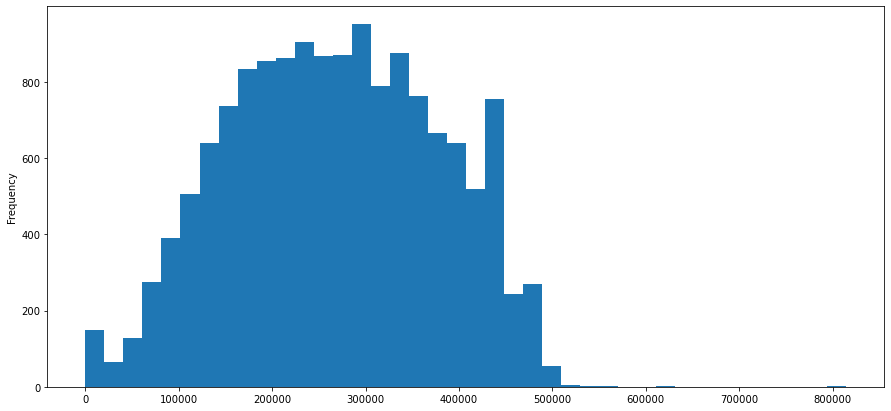

In [41]:
loan_perf[loan_perf['zero_balance_code'].isna() != True]['payment'].plot.hist(bins=40, figsize=(15,7))

## Getting only the loans that are not prematurely paid off to get only normal monthly payments

In [42]:
# loan_perf[loan_perf['zero_balance_code'].isna() == True].shape[0]
# loan_perf[loan_perf['zero_balance_code'].isna() != True]
loan_perf = loan_perf[(loan_perf['zero_balance_effective_date'] < loan_perf['maturity_date']) != True]

In [43]:
loan_perf

,loan_sequence_number,current_actual_upb,original_upb,loan_age,maturity_date,remaining_months_to_legal_maturity,credit_score,original_interest_rate,current_interest_rate,estimated_loan-to-value,...,original_loan_term,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb,date,year,month,first_payment_year,first_payment_month,payment
0,F18Q10000213,300000.0,300000,0,204802,360,791,4.000,4.000,NaN,...,360,NaN,NaN,NaN,2018-02-01,2018,2,2018,3,-0.0
1,F18Q10000213,300000.0,300000,1,204802,359,791,4.000,4.000,NaN,...,360,NaN,NaN,NaN,2018-03-01,2018,3,2018,3,-0.0
2,F18Q10000213,299000.0,300000,2,204802,358,791,4.000,4.000,NaN,...,360,NaN,NaN,NaN,2018-04-01,2018,4,2018,3,1000.0
3,F18Q10000213,299000.0,300000,3,204802,357,791,4.000,4.000,NaN,...,360,NaN,NaN,NaN,2018-05-01,2018,5,2018,3,-0.0
4,F18Q10000213,298000.0,300000,4,204802,356,791,4.000,4.000,NaN,...,360,NaN,NaN,NaN,2018-06-01,2018,6,2018,3,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161982,F20Q31186863,412000.0,415000,2,204011,239,815,2.625,2.625,NaN,...,240,NaN,NaN,NaN,2020-12-01,2020,12,2020,12,-0.0
1161983,F20Q31187409,311000.0,313000,2,205009,358,745,2.990,2.990,NaN,...,360,NaN,NaN,NaN,2020-11-01,2020,11,2020,10,-0.0
1161984,F20Q31187409,311000.0,313000,3,205009,357,745,2.990,2.990,NaN,...,360,NaN,NaN,NaN,2020-12-01,2020,12,2020,10,-0.0
1161985,F20Q31187478,223000.0,224000,1,205010,359,715,3.125,3.125,NaN,...,360,NaN,NaN,NaN,2020-11-01,2020,11,2020,11,-0.0


## Mortgage payments vs Rent

In [74]:
%load_ext autoreload
%autoreload
from transformers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
zillow = transform_zillow('Zip_Zri_SingleFamilyResidenceRental.csv')

In [76]:
counties = ['Miami-Dade County', 'Broward County', 'Palm Beach County']

In [77]:
zillow = zillow[zillow['County'].isin(counties)]
zipcodes = zillow['Zipcode'].unique().tolist()

In [78]:
zillow = transform_zori('Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [79]:
zillow = zillow[zillow['Zipcode'].isin(zipcodes)]

In [80]:
zillow

,Zipcode,SizeRank,MsaName,Date,Rent,Year
28608,33411,91,"Miami-Fort Lauderdale, FL",2015-01-01,1383.0,2015
28613,33025,97,"Miami-Fort Lauderdale, FL",2015-01-01,1448.0,2015
28697,33009,230,"Miami-Fort Lauderdale, FL",2015-01-01,1486.0,2015
28724,33186,267,"Miami-Fort Lauderdale, FL",2015-01-01,1683.0,2015
28734,33063,284,"Miami-Fort Lauderdale, FL",2015-01-01,1285.0,2015
...,...,...,...,...,...,...
206784,33305,5886,"Miami-Fort Lauderdale, FL",2021-03-01,1808.0,2021
206788,33315,5926,"Miami-Fort Lauderdale, FL",2021-03-01,1734.0,2021
206814,33403,6440,"Miami-Fort Lauderdale, FL",2021-03-01,1608.0,2021
206824,33146,6625,"Miami-Fort Lauderdale, FL",2021-03-01,2186.0,2021


In [81]:
zillow['Month'] = zillow['Date'].dt.month

In [82]:
zillow.head()

,Zipcode,SizeRank,MsaName,Date,Rent,Year,Month
28608,33411,91,"Miami-Fort Lauderdale, FL",2015-01-01,1383.0,2015,1
28613,33025,97,"Miami-Fort Lauderdale, FL",2015-01-01,1448.0,2015,1
28697,33009,230,"Miami-Fort Lauderdale, FL",2015-01-01,1486.0,2015,1
28724,33186,267,"Miami-Fort Lauderdale, FL",2015-01-01,1683.0,2015,1
28734,33063,284,"Miami-Fort Lauderdale, FL",2015-01-01,1285.0,2015,1


In [83]:
zillow['Zipcode_00'] = zillow['Zipcode'].apply(lambda x: x[:3]+'00')
zillow = zillow[zillow['Zipcode_00'].isin(list(loan_perf['postal_code'].unique()))]
df_zillow = zillow.groupby(['Zipcode_00', 'Year', 'Month']).mean().reset_index()[['Zipcode_00', 'Year', 'Month','Rent']]
df_zillow.rename(columns={'Zipcode_00': 'postal_code', 'Year': 'year', 'Month': 'month', 'Rent': 'rent'}, inplace=True)

## Deriving a monthly mean payment by zipcode

#### Getting nonzero payments to calculate mean monthly payment

In [84]:
loan_perf_nonzero_payments = loan_perf[loan_perf['payment'] > 0]

#### Getting a median payment per loan to get rid of large one-time-payments

In [85]:
median_payment = loan_perf_nonzero_payments.groupby('loan_sequence_number')[['payment']].median().reset_index().rename(columns={'payment':'median_payment'})

In [86]:
median_payment

,loan_sequence_number,median_payment
0,F18Q10000213,462.770
1,F18Q10000253,271.305
2,F18Q10000352,850.060
3,F18Q10000367,434.510
4,F18Q10000370,337.600
...,...,...
79348,F20Q31184661,1000.000
79349,F20Q31185309,1000.000
79350,F20Q31186200,1000.000
79351,F20Q31186214,1000.000


<AxesSubplot:ylabel='Frequency'>

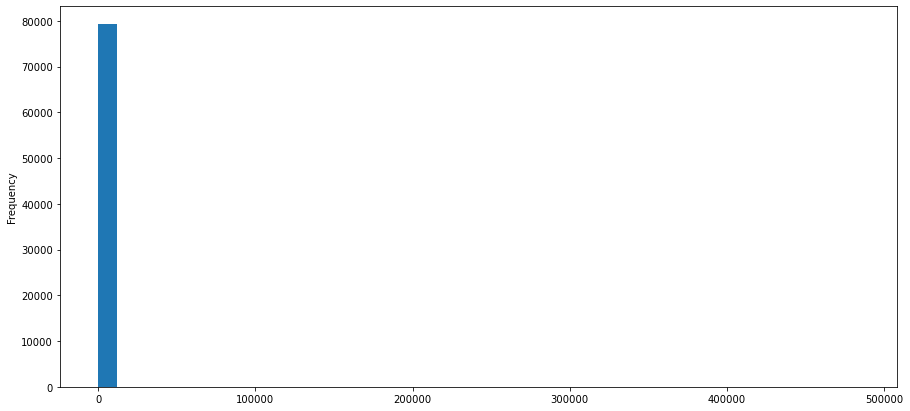

In [87]:
median_payment['median_payment'].plot.hist(bins=40, figsize=(15,7))

### Median payment still has some large payments that don't represent the average picture.
#### We will get rid of them

In [88]:
# getting a list of loan numbers that have payments over 20 000
big_payments_loans = median_payment[median_payment['median_payment'] > 20000].loan_sequence_number.unique().tolist()

In [89]:
loan_perf_nonzero_payments = loan_perf_nonzero_payments[loan_perf_nonzero_payments['loan_sequence_number'].isin(big_payments_loans) != True]

In [90]:
loan_perf_nonzero_payments = pd.merge(loan_perf_nonzero_payments, median_payment, on='loan_sequence_number')
loan_perf_nonzero_payments.sample(15)

,loan_sequence_number,current_actual_upb,original_upb,loan_age,maturity_date,remaining_months_to_legal_maturity,credit_score,original_interest_rate,current_interest_rate,estimated_loan-to-value,...,zero_balance_code,zero_balance_effective_date,zero_balance_removal_upb,date,year,month,first_payment_year,first_payment_month,payment,median_payment
615012,F19Q40046740,309106.01,314000,8,204911,352,807,3.500,3.500,75.0,...,NaN,NaN,NaN,2020-07-01,2020,7,2019,12,1008.89,1000.000
241741,F18Q20335847,277013.87,284000,14,204807,346,752,5.125,5.125,68.0,...,NaN,NaN,NaN,2019-09-01,2019,9,2018,8,427.56,428.150
271174,F18Q30071227,214106.89,221000,8,204808,352,774,4.500,4.500,90.0,...,NaN,NaN,NaN,2019-04-01,2019,4,2018,9,815.59,336.500
613066,F19Q40030587,295924.30,299000,7,204911,353,744,3.500,3.500,91.0,...,NaN,NaN,NaN,2020-06-01,2020,6,2019,12,75.70,1000.000
432863,F19Q10109026,143452.96,145000,10,204903,350,656,5.750,5.750,54.0,...,NaN,NaN,NaN,2020-01-01,2020,1,2019,4,158.05,161.110
154832,F18Q20083339,354323.96,360000,15,204805,345,681,4.750,4.750,73.0,...,NaN,NaN,NaN,2019-08-01,2019,8,2018,6,475.40,499.465
107022,F18Q10258163,170294.18,183000,8,203304,172,749,4.000,4.000,30.0,...,NaN,NaN,NaN,2018-12-01,2018,12,2018,5,1427.59,1468.570
458914,F19Q10226921,90677.25,92000,11,204904,349,773,4.875,4.875,21.0,...,NaN,NaN,NaN,2020-03-01,2020,3,2019,5,131.09,134.590
131312,F18Q20022829,121834.53,125000,19,204805,341,647,4.625,4.625,76.0,...,NaN,NaN,NaN,2019-12-01,2019,12,2018,6,172.43,172.765
168695,F18Q20117877,106791.75,110000,22,204805,338,662,5.500,5.500,82.0,...,NaN,NaN,NaN,2020-03-01,2020,3,2018,6,133.36,137.070


#### This distribution looks much better

<AxesSubplot:ylabel='Frequency'>

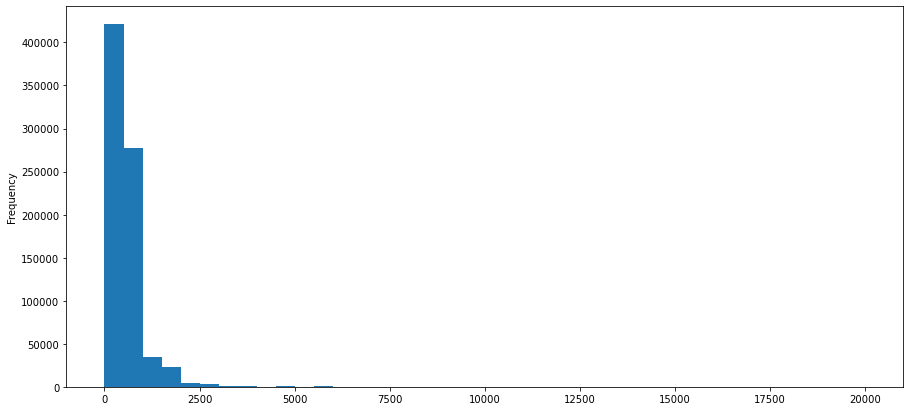

In [91]:
loan_perf_nonzero_payments['median_payment'].plot.hist(bins=40, figsize=(15,7))

#### Getting a mean loan payment per zipcode

In [92]:
monthly_pay_by_zip = loan_perf_nonzero_payments.groupby(['year', 'month', 'postal_code']).mean()[['median_payment']].\
                                                            reset_index().rename(columns={'median_payment': 'mortgage_payment'})
monthly_pay_by_zip

,year,month,postal_code,mortgage_payment
0,2018,3,33000,749.227398
1,2018,3,33100,715.097448
2,2018,3,33300,1007.015678
3,2018,3,33400,755.623349
4,2018,4,33000,702.434610
...,...,...,...,...
131,2020,11,33400,762.317497
132,2020,12,33000,761.916129
133,2020,12,33100,789.715666
134,2020,12,33300,793.044949


#### Getting a mortgage payment vs rent payment ratio

In [93]:
mortgage_vs_rent = pd.merge(df_zillow, monthly_pay_by_zip, on=['year', 'month', 'postal_code'])

In [94]:
mortgage_vs_rent['morgate_vs_rent'] = round(mortgage_vs_rent['mortgage_payment']*100/mortgage_vs_rent['rent'], 2)

In [95]:
mortgage_vs_rent['day'] = '01'
mortgage_vs_rent['date'] = pd.to_datetime(mortgage_vs_rent[['year', 'month','day']].apply(lambda row: '/'.join(row.values.astype(str)), axis=1))

In [96]:
# mortgage_vs_rent.sample(50)

In [97]:
m_vs_r = mortgage_vs_rent.pivot(index='date', values='morgate_vs_rent', columns='postal_code')
m_vs_r

postal_code,33000,33100,33300,33400
date,,,,
2018-03-01,43.07,38.66,57.09,42.23
2018-04-01,40.28,38.59,48.04,40.25
2018-05-01,37.69,36.80,44.07,39.21
2018-06-01,38.57,35.64,40.68,41.61
2018-07-01,39.38,37.58,40.67,39.67
2018-08-01,37.63,37.40,37.39,38.02
2018-09-01,36.78,35.71,37.31,36.17
2018-10-01,35.52,34.52,34.22,34.81
2018-11-01,33.19,33.21,32.76,33.16


In [98]:
ticks = m_vs_r.reset_index()['date'].astype(str).tolist()

Text(0, 0.5, 'Percent')

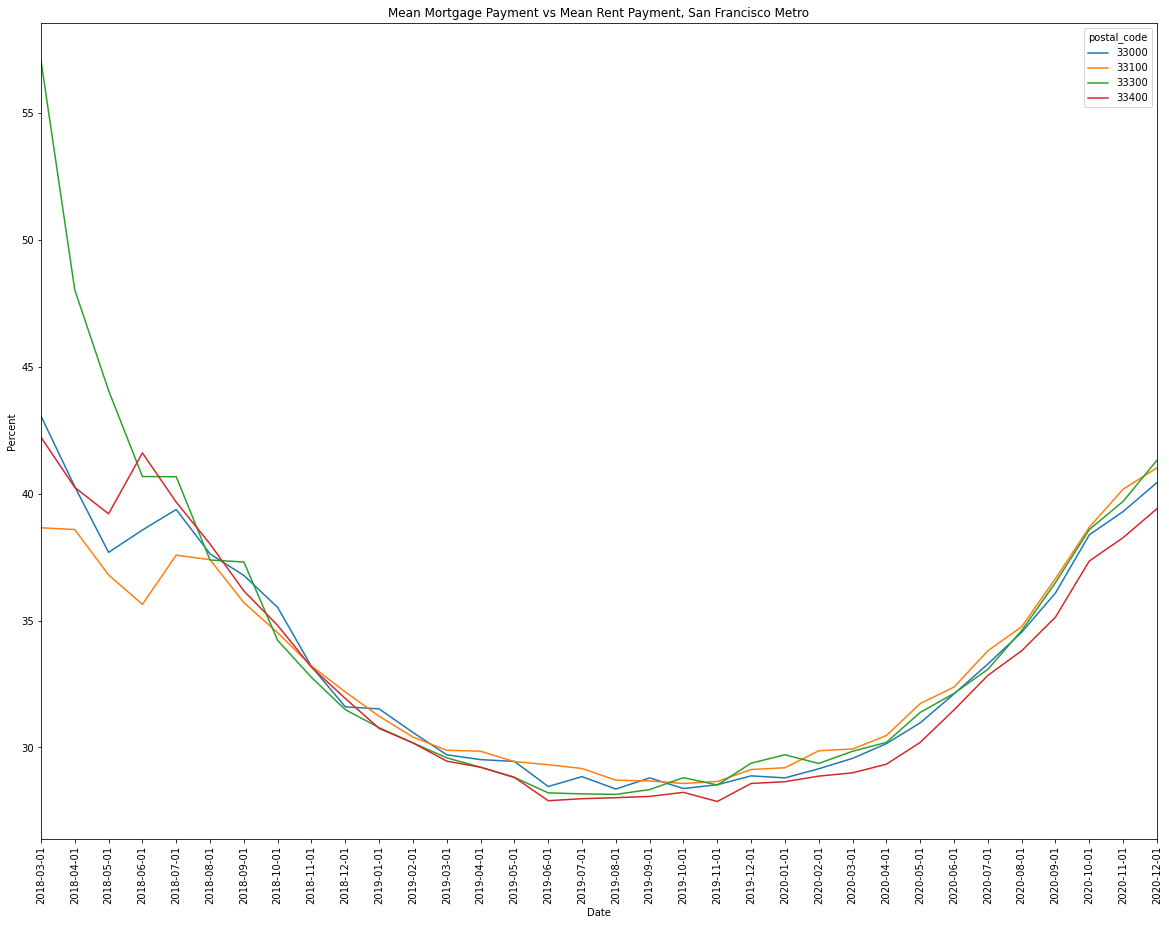

In [99]:
m_vs_r.plot.line(figsize=(20, 15), title='Mean Mortgage Payment vs Mean Rent Payment, San Francisco Metro')
plt.xticks(ticks, ticks, rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent')

In [101]:
mortgage_vs_rent.to_csv('mortgage_vs_rent_mi.csv')